In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('politifact_scraperussia17012023 - politifact_scraperussia17012023.csv')
df.drop(('idx'), axis=1, inplace=True)
df1 = pd.read_csv('politifact_scraperussia-ukriane05022023.csv')
df1.drop(('idx'), axis=1, inplace=True)
df1 = df1[df1['topic'] != 'russia-ukriane']
df = pd.concat([df, df1], axis=0)
df.head()

,claim,origin,URL,truth_value,stated_on,topic
0,A “default on our debt” would be unprecedented...,Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-true,"January 08, 2023",war
1,"As president, Donald Trump “marshaled the full...",Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-false,"January 06, 2023",war
2,A video shows migrants faking tears for news c...,Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"March 02, 2020",war
3,"After Joe Biden became vice president, at the ...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war
4,"Says he has been to “Afghanistan, Iraq and tho...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war


In [3]:
for i in df['topic'].unique():
  print(i, df[df['topic'] == i].shape)

war (2150, 6)
syria (316, 6)
conflict (800, 6)
ethiopia (22, 6)
civil-conflict (1977, 6)
weapons (1012, 6)
guns (1258, 6)
war-crimes (1960, 6)
insurgency (75, 6)
eritrea (9, 6)
myanmar (11, 6)
burma (11, 6)
al-qaeda (715, 6)
iran (432, 6)
yemen (91, 6)
afghanistan (492, 6)
ukraine (220, 6)
russia (746, 6)


In [4]:
df['year_of_publish'] = df['stated_on'].apply(lambda x: int(x[-4:]))
df['month_of_publish'] = df['stated_on'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
df['day_of_publish'] = df['stated_on'].apply(lambda x: int(x.split(',')[0].split(' ')[1]))
df.head()

,claim,origin,URL,truth_value,stated_on,topic,year_of_publish,month_of_publish,day_of_publish
0,A “default on our debt” would be unprecedented...,Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-true,"January 08, 2023",war,2023,January,8
1,"As president, Donald Trump “marshaled the full...",Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-false,"January 06, 2023",war,2023,January,6
2,A video shows migrants faking tears for news c...,Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"March 02, 2020",war,2020,March,2
3,"After Joe Biden became vice president, at the ...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war,2022,December,16
4,"Says he has been to “Afghanistan, Iraq and tho...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war,2022,December,16


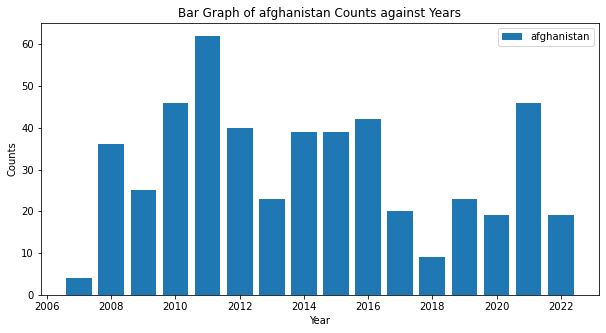

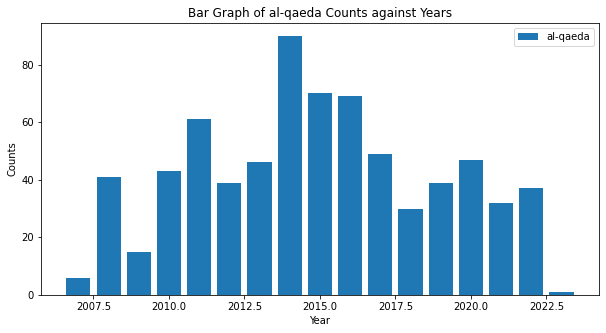

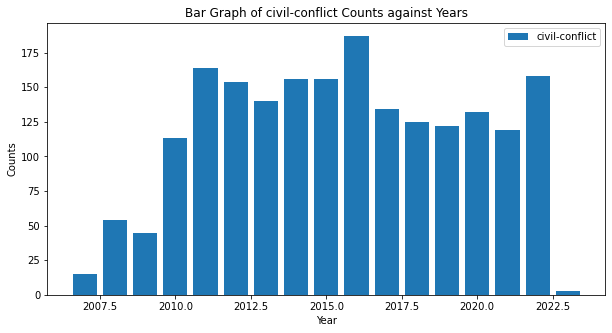

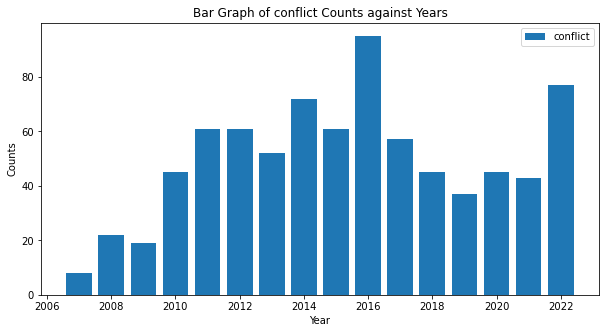

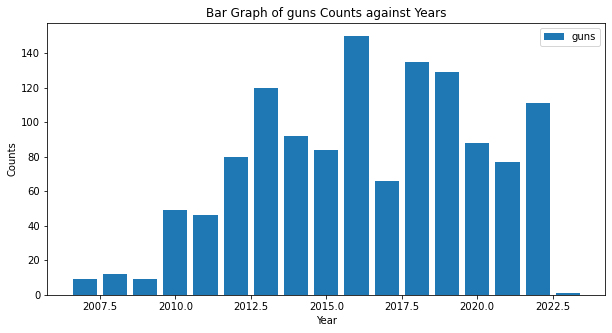

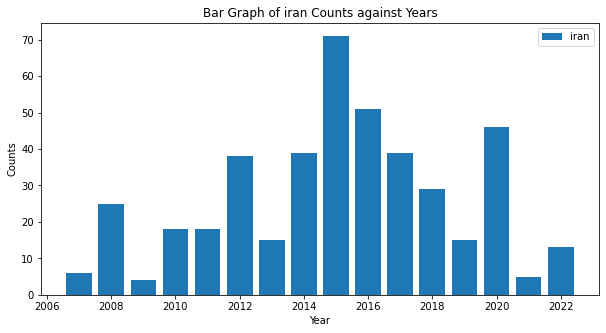

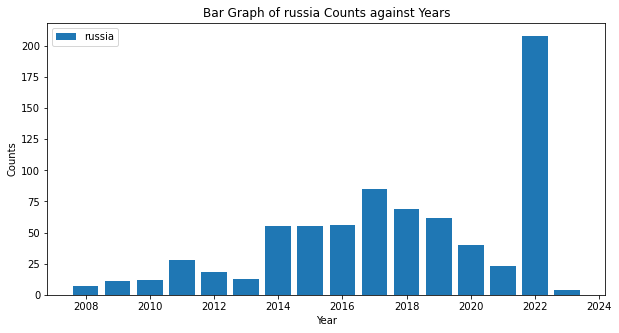

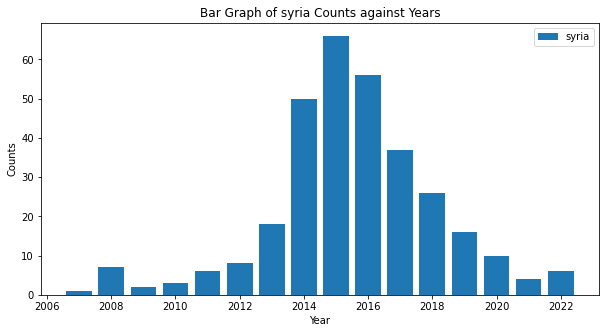

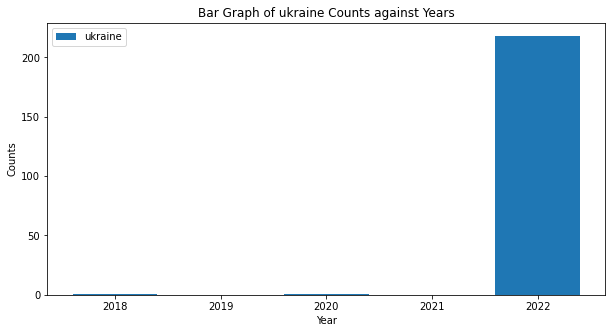

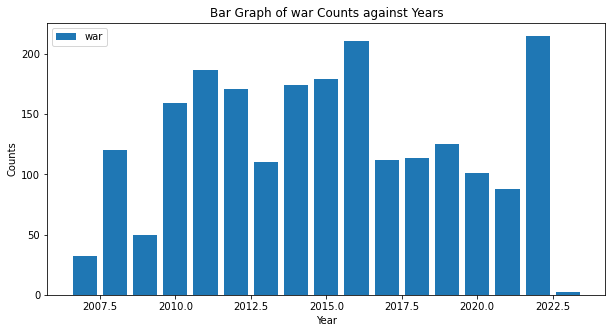

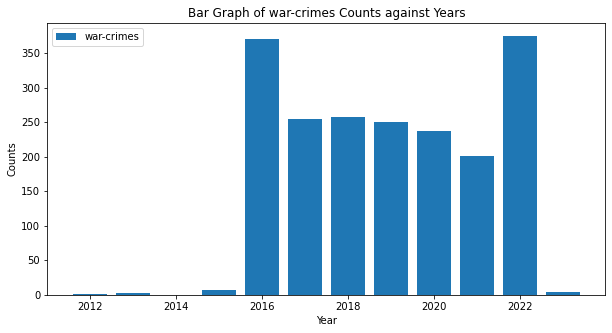

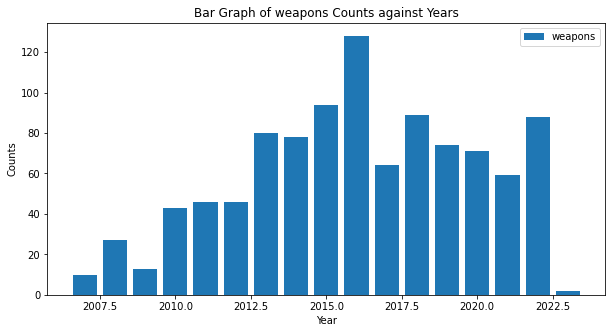

In [5]:
years = df['year_of_publish'].unique()
# Group the data by year and topic, and count the number of occurrences of each topic
grouped = df.groupby(['year_of_publish', 'topic']).size().reset_index(name='counts')
# Plot the bar graph
for topic, group in grouped.groupby('topic'):
    if topic in ['eritrea', 'myanmar', 'burma', 'yemen', 'ethiopia', 'insurgency']:
        continue
    plt.figure(figsize=(10, 5))
    plt.bar(group['year_of_publish'], group['counts'], label=topic)
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {topic} Counts against Years')
    plt.legend()
    plt.show()

In [6]:
import re

# Create a boolean mask that indicates which rows contain the keyword
mask = ((df['claim'].apply(lambda x: bool(re.search('russia|ukraine', x, re.IGNORECASE)))) & (df['topic'].isin(df['topic'].unique()))) | (df['topic'].isin(('russia', 'ukraine')))

# Use the mask to extract only the rows that contain the keyword
ndf = df[mask]
pd.options.display.max_rows = 999 
pd.set_option('display.max_colwidth', None)
ndf.drop(['URL', 'stated_on', 'origin'], axis=1, inplace=True)
ndf.reset_index(drop=True, inplace=True)
ndf.head()

c:\Users\Lokesh\.conda\envs\dlapp\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,claim,truth_value,topic,year_of_publish,month_of_publish,day_of_publish
0,Russia’s Army was “destroyed.”,meter-false,war,2022,December,18
1,The war in Ukraine is “all over.”,meter-false,war,2022,December,12
2,“Gas prices are down back to where they were before Russia invaded Ukraine.”,meter-true,war,2022,November,29
3,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine.",meter-false,war,2022,November,27
4,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.,meter-false,war,2022,November,13


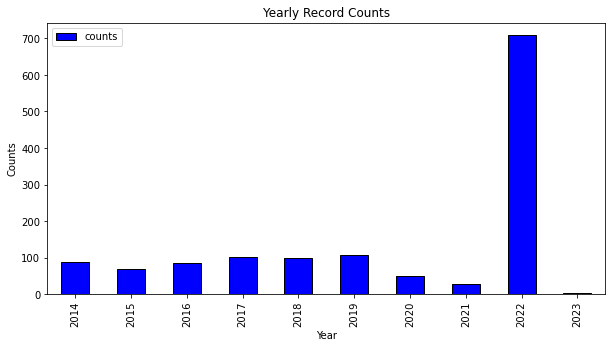

In [7]:
# Count the number of records for each year
yearly_counts = ndf.groupby(ndf['year_of_publish']).size().reset_index(name='counts')

# Plot the bar graph
yearly_counts[yearly_counts['year_of_publish'] >= 2014].plot.bar(x='year_of_publish', y='counts', color='blue', edgecolor='black', figsize=(10, 5))

# Add the title and labels to the graph
plt.title('Yearly Record Counts')
plt.xlabel('Year')
plt.ylabel('Counts')

# Show the plot
plt.show()

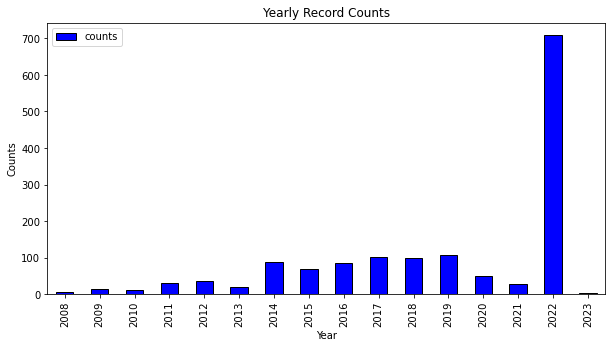

In [8]:
# Count the number of records for each year
yearly_counts = ndf.groupby(ndf['year_of_publish']).size().reset_index(name='counts')

# Plot the bar graph
yearly_counts.plot.bar(x='year_of_publish', y='counts', color='blue', edgecolor='black', figsize=(10, 5))

# Add the title and labels to the graph
plt.title('Yearly Record Counts')
plt.xlabel('Year')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [9]:
ndf[ndf['year_of_publish'] >= 2014].count()

claim               1343
truth_value         1343
topic               1343
year_of_publish     1343
month_of_publish    1343
day_of_publish      1343
dtype: int64

In [10]:
ndf['truth_value'].value_counts()

meter-false           671
tom_ruling_pof        232
meter-mostly-false    187
meter-half-true       169
meter-mostly-true     131
meter-true             66
meter-full-flop         5
meter-half-flip         2
Name: truth_value, dtype: int64

In [11]:
ndf['title'] = ndf['claim']
ndf.drop(['topic'], inplace=True, axis=1)
ndf.head()

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8264/3283046789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['title'] = ndf['claim']
c:\Users\Lokesh\.conda\envs\dlapp\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,claim,truth_value,year_of_publish,month_of_publish,day_of_publish,title
0,Russia’s Army was “destroyed.”,meter-false,2022,December,18,Russia’s Army was “destroyed.”
1,The war in Ukraine is “all over.”,meter-false,2022,December,12,The war in Ukraine is “all over.”
2,“Gas prices are down back to where they were before Russia invaded Ukraine.”,meter-true,2022,November,29,“Gas prices are down back to where they were before Russia invaded Ukraine.”
3,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine.",meter-false,2022,November,27,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine."
4,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.,meter-false,2022,November,13,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.


In [12]:
def year_fn(r):
  try:
    return int(r.split('at')[0].split(',')[1].strip())
  except:
    return int('2023')

def month_fn(r):
  try:
    return r.split('at')[0].split(' ')[0].strip()
  except:
    return '2023'

def day_fn(r):
  try:
    return int(r.split('at')[0].split(',')[0].split(' ')[1].strip())
  except:
    return int('2023')

def remove_opinion_str(r):
  try:
    if 'Opinion |' in r:
      r.replace('Opinion | ', '')
    return r
  except:
    return r

tdf = pd.read_csv('washington_post.csv')
tdf.head()
tdf['stated_on'].unique()
tdf['year_of_publish'] = tdf['stated_on'].apply(year_fn)
tdf['month_of_publish'] = tdf['stated_on'].apply(month_fn)
tdf['day_of_publish'] = tdf['stated_on'].apply(day_fn)
tdf['title'] = tdf['title'].apply(remove_opinion_str)

tdf.drop(['stated_on', 'id', 'title'], axis = 1, inplace=True)

In [13]:
tdf.count()

claim                992
truth_value         1000
year_of_publish     1000
month_of_publish    1000
day_of_publish      1000
dtype: int64

In [14]:
df = pd.concat([ndf, tdf])
df.drop(['title'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

full_flop_rows = df.index[df['truth_value'] == 'meter-full-flop']
half_flip_rows = df.index[df['truth_value'] == 'meter-half-flip']
rows_to_delete = full_flop_rows.to_list() + half_flip_rows.to_list()
df.drop(rows_to_delete, inplace=True)
df.reset_index(drop=True, inplace=True)

df.loc[df['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
df.loc[df['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'

df.dropna(how='all', inplace=True)

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8264/2172314401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8264/2172314401.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'


In [15]:
df['truth_value'].value_counts()

meter-true            1066
meter-false            671
tom_ruling_pof         232
meter-mostly-false     187
meter-half-true        169
meter-mostly-true      131
Name: truth_value, dtype: int64

In [16]:
df.to_csv('latest.csv')

In [ ]:
# res = []
# flagged = {}
# for i, row in df.iterrows():
#   print(i)
#   if flagged.get(i, False):
#     continue
#   for j, dup in df.iterrows():
#     if i != j and row['claim'] == dup['claim']:
#       flagged[j] = True
#   res.append(row)
# fdf = df.copy()
# fdf.drop(index=df.index[list(flagged.keys())], inplace=True)
# fdf.reset_index(drop=True, inplace=True)
# hft = fdf[(fdf['truth_value'] == 'meter-mostly-true') | (fdf['truth_value'] == 'meter-mostly-false')]
# hft.reset_index(drop=True, inplace=True)
# hft.to_csv('hft.csv')
# years = fdf['year_of_publish'].unique()
# # Group the data by year and topic, and count the number of occurrences of each topic
# grouped = fdf.groupby(['year_of_publish']).size().reset_index(name='counts')
# # Plot the bar graph
# plt.figure(figsize=(10, 5))
# plt.bar(grouped['year_of_publish'], grouped['counts'])
# plt.xlabel('Year')
# plt.ylabel('Counts')
# plt.title(f'Bar Graph of {topic} Counts against Years')
# plt.legend()
# plt.show()

In [46]:
fidf = pd.read_csv('./politifact_scraperussia17012023 - politifact_scraperussia17012023.csv')
fidf.drop(['idx', 'origin', 'URL'], axis=1, inplace=True)
fidf.drop_duplicates(subset=['claim'], ignore_index=True, inplace=True)
fidf['year_of_publish'] = fidf['stated_on'].apply(lambda x: int(x[-4:]))
fidf['month_of_publish'] = fidf['stated_on'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
fidf['day_of_publish'] = fidf['stated_on'].apply(lambda x: int(x.split(',')[0].split(' ')[1]))
fidf.drop(['stated_on'], axis=True, inplace=True)

full_flop_rows = fidf.index[fidf['truth_value'] == 'meter-full-flop']
half_flip_rows = fidf.index[fidf['truth_value'] == 'meter-half-flip']
rows_to_delete = full_flop_rows.to_list() + half_flip_rows.to_list()
fidf.drop(rows_to_delete, inplace=True)
fidf.reset_index(drop=True, inplace=True)

fidf.loc[fidf['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
fidf.loc[fidf['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'

fidf.dropna(how='all', inplace=True)

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8264/2788787878.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fidf.loc[fidf['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8264/2788787878.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fidf.loc[fidf['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'


In [47]:
fidf.columns

Index(['claim', 'truth_value', 'topic', 'year_of_publish', 'month_of_publish',
       'day_of_publish'],
      dtype='object')

In [48]:
fidf['truth_value'].value_counts()

meter-false           1735
meter-mostly-false    1035
meter-half-true        995
meter-mostly-true      886
tom_ruling_pof         826
meter-true             652
meter-no-flip            8
Name: truth_value, dtype: int64

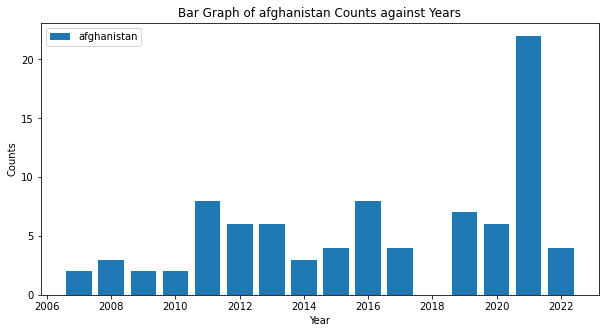

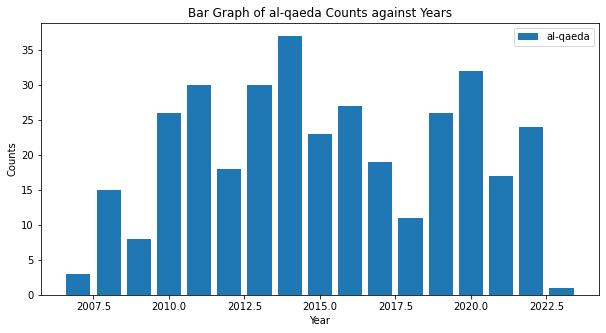

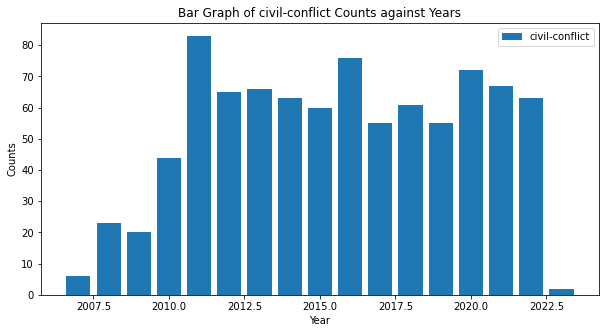

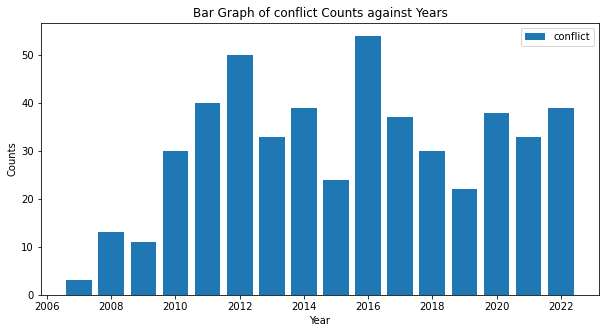

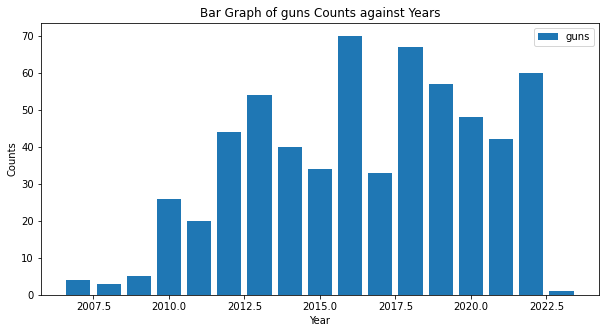

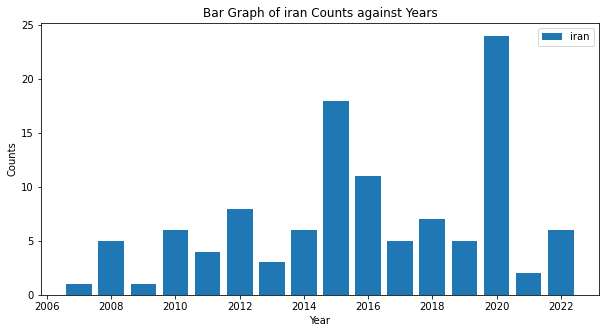

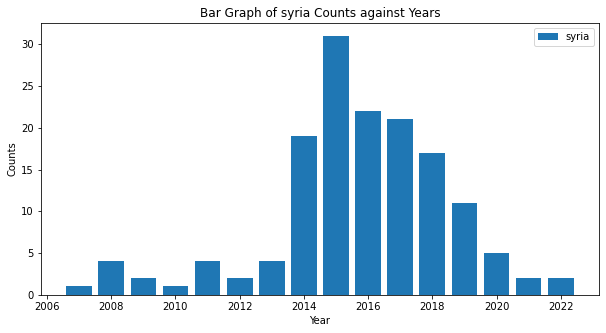

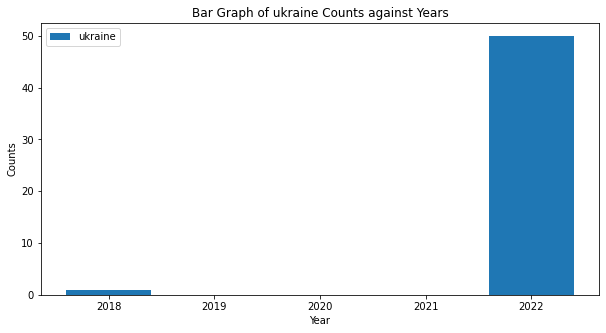

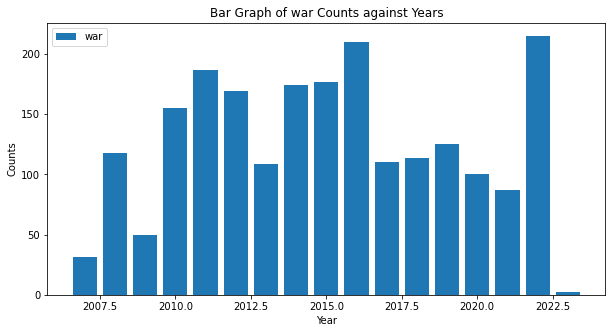

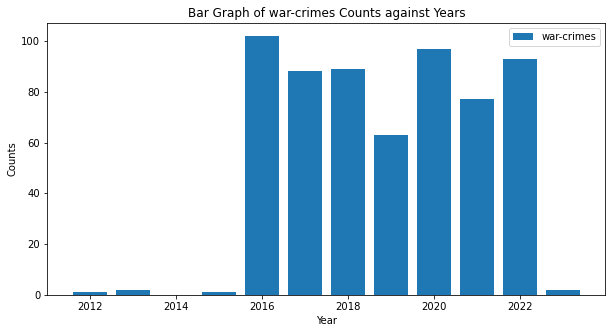

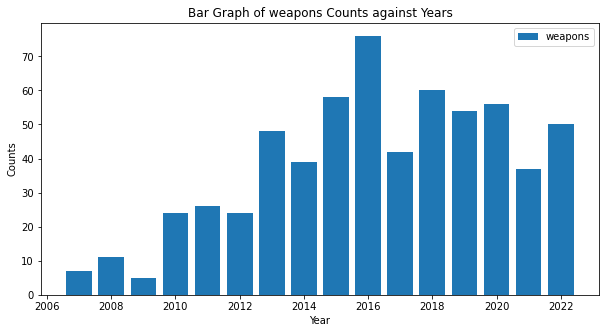

In [49]:
years = fidf['year_of_publish'].unique()
# Group the data by year and topic, and count the number of occurrences of each topic
grouped = fidf.groupby(['year_of_publish', 'topic']).size().reset_index(name='counts')
# Plot the bar graph
for topic, group in grouped.groupby('topic'):
    if topic in ['eritrea', 'myanmar', 'burma', 'yemen', 'ethiopia', 'insurgency']:
        continue
    plt.figure(figsize=(10, 5))
    plt.bar(group['year_of_publish'], group['counts'], label=topic)
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {topic} Counts against Years')
    plt.legend()
    plt.show()

fidf.drop(['topic'], axis=True, inplace=True)

In [61]:
finaldf = pd.concat([tdf, fidf])
finaldf.drop(finaldf.index[finaldf['truth_value'] == 'meter-no-flip'], inplace=True)
finaldf.reset_index(drop=True, inplace=True)
finaldf.head()

,claim,truth_value,year_of_publish,month_of_publish,day_of_publish
0,"Italian former Premier Silvio Berlusconi has once again put himself at odds with current Premier Giorgia Meloni by openly criticizing her for meeting with Ukraine’s leader, whom he blamed for the nearly year-old Russian invasion",meter-true,2023,February,13
1,"Former Premier Silvio Berlusconi has once again put himself at odds with Premier Giorgia Meloni by openly criticizing her for meeting with Ukraine’s leader, whom he blamed for the year-old Russian invasion",meter-true,2023,February,13
2,The small coal-mining town of Vuhledar on Ukraine’s eastern front line has emerged as a critical hot spot in the fight for Donetsk province,meter-true,2023,February,11
3,"Amid inflation, power-grid cuts and other pressures applied by Russia and spilling over from the war in Ukraine, Moldova’s government resigned Friday.",meter-true,2023,February,11
4,President Joe Biden will travel to Poland later this month to rally allies a year after Russia’s assault on Ukraine began,meter-true,2023,February,11


In [62]:
finaldf.count(), finaldf['truth_value'].value_counts()

(claim               7121
 truth_value         7129
 year_of_publish     7129
 month_of_publish    7129
 day_of_publish      7129
 dtype: int64,
 meter-false           1735
 meter-true            1652
 meter-mostly-false    1035
 meter-half-true        995
 meter-mostly-true      886
 tom_ruling_pof         826
 Name: truth_value, dtype: int64)

In [63]:
finaldf['truth_value'] = finaldf['truth_value'].replace('tom_ruling_pof', 'meter-false')
finaldf['truth_value'] = finaldf['truth_value'].replace('meter-half-true', 'meter-mostly-true')


In [66]:
finaldf.count(), finaldf['truth_value'].value_counts()

(claim               7121
 truth_value         7129
 year_of_publish     7129
 month_of_publish    7129
 day_of_publish      7129
 dtype: int64,
 meter-false           2561
 meter-mostly-true     1881
 meter-true            1652
 meter-mostly-false    1035
 Name: truth_value, dtype: int64)

In [65]:
finaldf.to_csv('./final.csv')